In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import os

In [3]:
# data

path = os.getcwd()
drama = pd.read_csv(path+'/drama.csv',sep=',')
drama.head()

,드라마,날짜,회차,요일,배우,CPI,CPI증감률,경제성장률,실업률,미세먼지,연출자,작가,특이사항,시청률
0,넝쿨째 굴러온 당신 (2012.02.25~2012.09.09),2012.02.25,1,0,75,96.436,2.9,0.7,4.2,47,5,10,0,22.3
1,넝쿨째 굴러온 당신 (2012.02.25~2012.09.09),2012.02.26,2,1,75,96.436,2.9,0.7,4.2,47,5,10,0,28.9
2,넝쿨째 굴러온 당신 (2012.02.25~2012.09.09),2012.03.03,3,0,75,96.436,2.9,0.7,3.7,43,5,10,0,25.7
3,넝쿨째 굴러온 당신 (2012.02.25~2012.09.09),2012.03.04,4,1,75,96.436,2.9,0.7,3.7,43,5,10,0,29.9
4,넝쿨째 굴러온 당신 (2012.02.25~2012.09.09),2012.03.10,5,0,75,96.436,2.9,0.7,3.7,43,5,10,0,26.9


In [4]:
drama.pop('드라마')
drama.pop('날짜')
drama.pop('CPI')
drama.pop('CPI증감률')

0      2.9
1      2.9
2      2.9
3      2.9
4      2.9
      ... 
779   -0.3
780   -0.3
781   -0.3
782   -0.3
783   -0.3
Name: CPI증감률, Length: 784, dtype: float64

In [5]:
drama.rename(columns={'회차': 'Episode', '요일': 'Day', '배우': 'Actor', '경제성장률': 'GDP' , '실업률' : 'Job',  '미세먼지': 'Dust',
                     '연출자': 'Director', '작가': 'Author', '특이사항': 'Exception', '시청률': 'Rate'}, inplace=True)

In [6]:
print(drama.shape)
drama.head()

(784, 10)


,Episode,Day,Actor,GDP,Job,Dust,Director,Author,Exception,Rate
0,1,0,75,0.7,4.2,47,5,10,0,22.3
1,2,1,75,0.7,4.2,47,5,10,0,28.9
2,3,0,75,0.7,3.7,43,5,10,0,25.7
3,4,1,75,0.7,3.7,43,5,10,0,29.9
4,5,0,75,0.7,3.7,43,5,10,0,26.9


# PreProcessing

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(drama.iloc[:,2:-2])
X_scaled = scaler.transform(drama.iloc[:,2:-2])
np.mean(X_scaled), np.std(X_scaled)
drama.iloc[:,2:-2] = X_scaled

X = drama.values[:,:-1]
y = drama.iloc[:,-1:].values

X.shape, y.shape

((784, 9), (784, 1))

In [8]:
mean = 29.29
y_label = np.zeros(784)

for i in range(784):
    if y[i] > mean :
        y_label[i] = 1 # 흥행 성공
        
y_label.sum() # 저랑 숫자가 달라서 여쭤봅니다.

349.0

# Train_Test_Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y_label, test_size = 0.25, random_state = 777)

print(
    
    X_train.shape,
    X_test.shape,
    y_train.shape,
    y_test.shape
)

(588, 9) (196, 9) (588,) (196,)


# Logisitc Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

classifier = LogisticRegression()

classifier.fit(X_train,y_train)

expected = y_test
predicted = classifier.predict(X_test)

print('\nLR Confusion Matrix:\n',
     metrics.confusion_matrix(expected,predicted))
print(metrics.classification_report(expected,predicted))


LR Confusion Matrix:
 [[100  11]
 [ 12  73]]
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90       111
         1.0       0.87      0.86      0.86        85

    accuracy                           0.88       196
   macro avg       0.88      0.88      0.88       196
weighted avg       0.88      0.88      0.88       196



/home/smsm8898/miniconda3/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
# 오분류 찾기
error_label = list()

for i in range(len(predicted)):
    if predicted[i] != expected[i]:
        error_label.append(i)
        
print(len(error_label))
print(error_label)


23
[16, 18, 34, 46, 58, 65, 66, 67, 69, 70, 95, 99, 128, 132, 135, 142, 152, 163, 164, 169, 175, 182, 193]


10


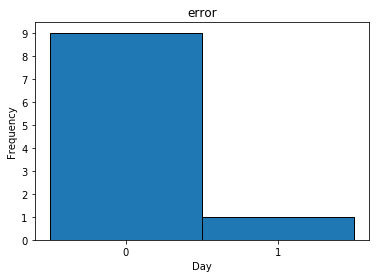

In [18]:
# 0인데 1로 오분류 : 10개
print(len(drama.iloc[error_label][drama.iloc[error_label]['Rate']<=mean] ))
drama.iloc[error_label][drama.iloc[error_label]['Rate']<=mean] 
plt.hist(drama.iloc[error_label][drama.iloc[error_label]['Rate']<=mean].Day,bins=[-.5,.5,1.5], ec="k")
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.xticks(range(0,2))
plt.yticks(range(10))
plt.title("error")
plt.show()
# day가 0이 상당히 많음

13


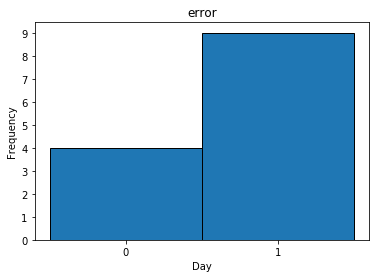

In [20]:
# 1인데 0으로 오분류 : 12개
print(len(drama.iloc[error_label][drama.iloc[error_label]['Rate']>mean] ))

drama.iloc[error_label][drama.iloc[error_label]['Rate']>mean]
plt.hist(drama.iloc[error_label][drama.iloc[error_label]['Rate']>mean].Day,bins=[-.5,.5,1.5], ec="k")
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.xticks(range(0,2))
plt.yticks(range(10))
plt.title("error")
plt.show()
# day가 1이 상당히 많음
# Actor 점수가 74, 75, 76임

In [63]:
print(drama['Actor'].unique()) # 53, 76, 15개
print(drama['GDP'].unique()) # -0.4, , 1.5, 12개
print(drama['Job'].unique()) # 2.4, 4.9, 22개

[75 76 58 74 55 72 53 62 61 66 64 79 65 73 63]
[ 0.7  0.4  0.6  1.1  0.9  0.2  1.5  1.   0.5  0.8 -0.1 -0.4]
[4.2 3.7 3.5 3.1 3.2 3.  2.9 2.7 2.6 2.4 3.9 3.8 3.4 3.3 2.8 4.  4.9 4.7
 4.8 3.6 4.1 4.4]


In [69]:
drama['Job'].max()

4.9

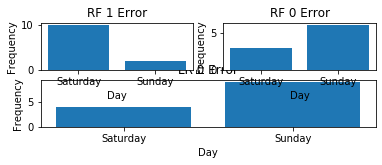

In [54]:
hist1 = { 'Saturday':9, 'Sunday' : 1}
hist2 = { 'Saturday':4, 'Sunday':9}
hist3 = { 'Saturday':10, 'Sunday' : 2}
hist4 = { 'Saturday':3, 'Sunday':6}

# fig = plt.figure()

plt.subplot(4,1,1)
plt.bar(list(hist1.keys()), hist1.values())
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.title("LR 1 Error")

plt.subplot(4,1,2)
plt.bar(list(hist2.keys()), hist2.values())
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.title("LR 0 Error")

plt.subplot(4,2,1)
plt.bar(list(hist3.keys()), hist3.values())
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.title("RF 1 Error")

plt.subplot(4,2,2)
plt.bar(list(hist4.keys()), hist4.values())
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.title("RF 0 Error")


plt.show()

In [ ]:
hist = pd.DataFrame()